In [2]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre: Gabriel Rodríguez Suárez*

*Identificación: 1089931997*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



## Usando quad para hallar la integral:

In [46]:
f = lambda x,y,z,w: x + y + z + w

a = lambda x,y,z: z**2
b = lambda x,y,z: z+3

I1 = quad(f, a, b)

TypeError: '<' not supported between instances of 'function' and 'function'

In [229]:
def integral_w(x,y,z,w):
    f = x+y+z+w
    return f

def lim_z(x,y,z):
    lim = np.array([z**2, z+3])
    return lim

def lim_y(x,y):
    lim = [y**2, y+2]
    return lim

def lim_x(x):
    lim = [0, 1]
    return lim

In [265]:
Iw = quad(integral_w, lim_z(x,y,z)[0], lim_z(x,y,z)[1], args=(x,y,z))

TypeError: cannot determine truth value of Relational

In [228]:
from scipy.integrate import nquad
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021811
Error estimado: 1.8391891749223705e-12


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



Recomendación: **Correr las secciones completas**

## a) Para $A_{\phi}(r=1.1,\theta)$:

In [152]:
a, I , cte = 1, 3, 1

In [153]:
r = 1.1
theta_values = np.linspace(1e-8, np.pi, 100)

In [154]:
fk_2 = lambda theta: (4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r*np.sin(theta))
k_2values = fk_2(theta_values)
#print(k_2values)

In [155]:
def K(k):
    K_prima = lambda phi: 1/(1-k*np.sin(phi))
    IK = quad(K_prima, 0 , np.pi/2)[0]
    return IK

In [156]:
integral_K = np.zeros_like(k_2values)
for i, k_ in enumerate (k_2values):
    integral_K[i] = K(k_)


In [157]:
def E(k):
    E_prima = lambda phi: 1-k*np.sin(phi)
    IE = quad(E_prima, 0 , np.pi/2)[0]
    return IE

In [158]:
integral_E = np.zeros_like(k_2values)
for j, k_ in enumerate(k_2values):
    integral_E[j] = E(k_)

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

In [159]:
def A_phi(a, r, I, cte, theta2, k2,  K_, E_):
    A = cte*((4*I*a)/np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta2))) * (((2-k2)*K_ - 2*E_)/k2)
    return A

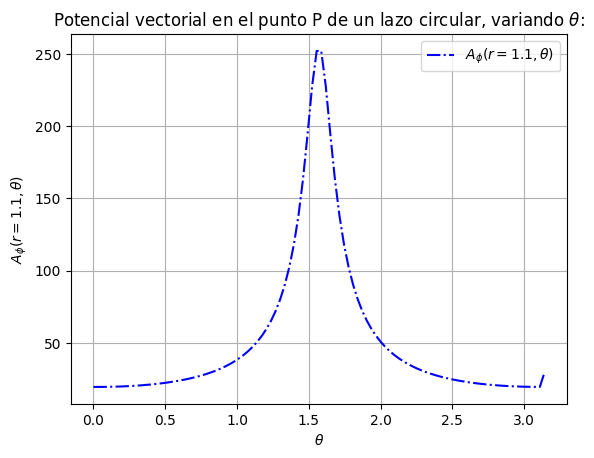

In [160]:
A_ = A_phi(a, r, I, cte, theta_values, k_2values, integral_K, integral_E)

plt.plot(theta_values, A_, 'b-.', label=r'$A_{\phi}(r=1.1, \theta)$')
plt.title(r'Potencial vectorial en el punto P de un lazo circular, variando $\theta$:')
plt.legend()
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$A_{\phi}(r=1.1, \theta)$')
plt.show()

## b) Para $A_{\phi}(r,\theta = \pi /3)$

In [161]:
a, I , cte, theta = 1, 3, 1, np.pi/3

In [162]:
r_values = np.linspace(1e-5, 10, 100)

fk_2 = lambda r: (4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r*np.sin(theta))
k_2values = fk_2(r_values)
#print(k_2values)

In [163]:
def K(k):
    K_prima = lambda phi: 1/(1-k*np.sin(phi))
    IK = quad(K_prima, 0 , np.pi/2)[0]
    return IK

In [164]:
integral_K = np.zeros_like(k_2values)
for i, k_ in enumerate (k_2values):
    integral_K[i] = K(k_)

In [165]:
def E(k):
    E_prima = lambda phi: 1-k*np.sin(phi)
    IE = quad(E_prima, 0 , np.pi/2)[0]
    return IE

In [166]:
integral_E = np.zeros_like(k_2values)
for j, k_ in enumerate(k_2values):
    integral_E[j] = E(k_)

#integral_E

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

In [167]:
def A_phi(a, r, I, cte, theta2, k2,  K_, E_):
    A = cte*((4*I*a)/np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta2))) * (((2-k2)*K_ - 2*E_)/k2)
    return A

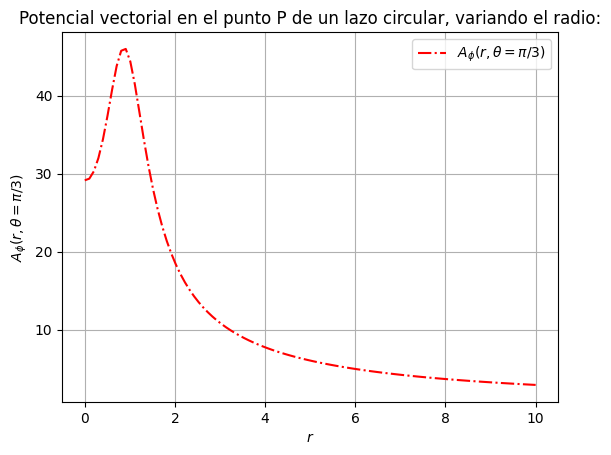

In [168]:
A_ = A_phi(a, r_values, I, cte, theta, k_2values, integral_K, integral_E)

plt.plot(r_values, A_, 'r-.', label=r'$A_{\phi}(r, \theta = \pi/3)$')
plt.title('Potencial vectorial en el punto P de un lazo circular, variando el radio:')
plt.legend()
plt.grid()
plt.xlabel(r'$r$')
plt.ylabel(r'$A_{\phi}(r, \theta = \pi/3)$')
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

## a) Función potencia_inversa:

In [ ]:
def potencia_inversa(A, tol=1e-7, max_iter=100):
    n = np.shape(A)[0]
    x = np.ones(n)
    l0 = 0
    for k in range(max_iter):
        y = np.linalg.solve(A,x)
        x_new = y/np.linalg.norm(y)
        l = (x_new @ A @ x_new)/np.dot(x_new, x_new)
        if abs(l - l0) < tol:
            print(f'Converge luego de {k+1} iteraciones.')
            return y, l
        x = x_new
        l0 = l
    print(f'Luego de {max_iter} no hubo convergencia:')
    return y, l

## b y c) Comparando con la matriz $A$ y np.linalg.eig:

In [3]:
A = np.array([
    [5,2],
    [2,2]
    ])

y, l = potencia_inversa(A)
print(f'Autovalor por la función: {l}')

l_, v_ = np.linalg.eig(A)
print(f'Autovalores por numpy: {l_}')

NameError: name 'np' is not defined

# 4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [273]:
def det_autovalores(valores):
    det_A = 1
    for i in range(len(valores)):
        det_A *= valores[i]
    return det_A

In [275]:
n = 5
#a = np.random.randint(1,10)
A = np.random.randint(10, size=(n,n))

#print(A)
autovalores, autovectores = np.linalg.eig(A)
print(autovalores)

u = det_autovalores(autovalores)
print('Determinante por fórmula:')
print(u)


print('Determinanete por numpy:')
det_np = np.linalg.det(A)
print(det_np)

[25.04766181+0.j          0.23043296+2.02089309j  0.23043296-2.02089309j
 -1.75426387+2.17697342j -1.75426387-2.17697342j]
Determinante por fórmula:
(810.0000000000009+0j)
Determinanete por numpy:
809.9999999999998
